In [6]:
import numpy as np 

class Bandit: 
    def __init__(self): 
        self.arm_values = np.random.normal(0,1,10) 
        self.K = np.zeros(10) 
        self.est_values = np.zeros(10) 
        
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random() 
        if epsilon>rand_num: 
          return np.random.randint(10) 
        else: 
          return np.argmax(self.est_values)

    def get_reward(self,action): 
        noise = np.random.normal(0,1) 
        reward = self.arm_values[action] + noise 
        return reward 

    def update_est(self,action,reward): 
        self.K[action] += 1 
        alpha = 1./self.K[action] 
        self.est_values[action] += alpha * (reward - self.est_values[action]) # keeps running average of rewards

In [7]:
def experiment(bandit,Npulls,epsilon):
    history = [] 
    for i in range(Npulls): 
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action) 
        bandit.update_est(action,R) 
        history.append(R) 
    return np.array(history)

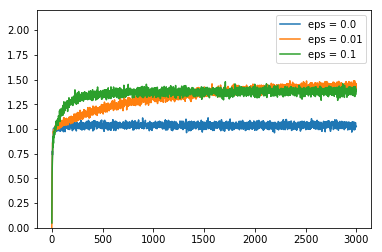

In [25]:
Nexp = 2000
Npulls = 3000 
avg_outcome_eps0p0 = np.zeros(Npulls) 
avg_outcome_eps0p01 = np.zeros(Npulls) 
avg_outcome_eps0p1 = np.zeros(Npulls) 

for i in range(Nexp): 
   bandit = Bandit() 
   avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0) 
   bandit = Bandit() 
   avg_outcome_eps0p01 += experiment(bandit,Npulls,0.01) 
   bandit = Bandit() 
   avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1) 

avg_outcome_eps0p0 /= np.float(Nexp) 
avg_outcome_eps0p01 /= np.float(Nexp) 
avg_outcome_eps0p1 /= np.float(Nexp) 

# plot results 
import matplotlib.pyplot as plt 

plt.plot(avg_outcome_eps0p0,label="eps = 0.0") 
plt.plot(avg_outcome_eps0p01,label="eps = 0.01") 
plt.plot(avg_outcome_eps0p1,label="eps = 0.1") 
plt.ylim(0,2.2) 
plt.legend() 
plt.show()

In [57]:
avg_outcome_eps0p0

array([ 0.0501615 ,  0.2920463 ,  0.44685304, ...,  1.02830223,
        1.02666279,  1.02487049])

In [52]:

def get_bandit_function(bandits_means, bandits_sigma=1):
    reward = np.random.normal()
    
    def checkValue(action):
        try: return bandits_means[action]+reward 
        except: print("Bandit doesn't exist . Follow Instruction please")
            
    return lambda action : checkValue(action)

In [55]:
avg_rewards_e01 = get_average_rewards()
avg_rewards_e005 = get_average_rewards(0.05)
avg_rewards_e001 = get_average_rewards(0.01)
avg_rewards_greedy = get_average_rewards(0.0)

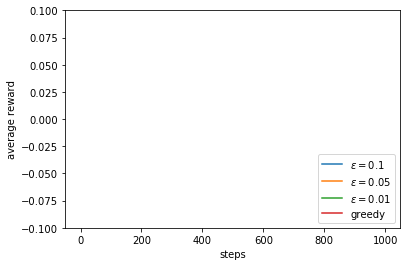

In [56]:
#
import matplotlib.pyplot as plt

nb_steps = 1000
plt.plot(avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")
plt.ylim(-0.10,0.10)
plt.show()

In [35]:
np.random.normal()

1.6724268791552006